<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/7_1_K_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D0%B5_(K_means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7.1.K-средние (K-means)



#### Введение в K-средние (K-means)

K-средние (K-means) — это популярный метод кластеризации, который используется для группировки данных на основе их схожести. Алгоритм K-means нацелен на разбиение данных на $K$ кластеров, при этом каждый объект принадлежит кластеру, центр тяжести которого является ближайшим. В задачах обработки естественного языка (NLP) K-means может быть применен для кластеризации текстов, предложений, слов или их векторных представлений.

#### Постановка задачи K-средних

Пусть $X = \{x_1, x_2, \ldots, x_n\}$ — множество объектов, которые нужно кластеризовать, где $x_i \in \mathbb{R}^d$, т.е. каждый объект — это точка в $d$-мерном пространстве. Необходимо разбить это множество на $K$ кластеров, так чтобы каждый объект $x_i$ был привязан к одному из $K$ центроидов $\mu_1, \mu_2, \ldots, \mu_K$.

Основная цель K-means — минимизировать функцию стоимости (или потерь), которая определяется как сумма квадратов расстояний от каждой точки до ближайшего центроида:

$$
J = \sum_{i=1}^n \min_{j \in \{1, \ldots, K\}} \|x_i - \mu_j\|^2,
$$

где $\|x_i - \mu_j\|$ — это евклидово расстояние между точкой $x_i$ и центроидом $\mu_j$.

#### Алгоритм K-средних

Алгоритм K-средних работает итеративно и состоит из следующих шагов:

1. **Инициализация центроидов**: Выбрать $K$ начальных центроидов $\mu_1, \mu_2, \ldots, \mu_K$. Это можно сделать случайным образом из набора данных или с использованием более сложных методов, таких как K-means++.

2. **Назначение точек кластерам**: Для каждой точки $x_i$ вычислить расстояния до всех центроидов и присвоить её кластера $j$, соответствующему ближайшему центроиду:

   $$
   c_i = \arg \min_{j \in \{1, \ldots, K\}} \|x_i - \mu_j\|^2,
   $$

   где $c_i$ — это индекс кластера, к которому принадлежит точка $x_i$.

3. **Обновление центроидов**: Для каждого кластера пересчитать новый центроид как среднее всех точек, принадлежащих этому кластеру:

   $$
   \mu_j = \frac{1}{n_j} \sum_{i: c_i = j} x_i,
   $$

   где $n_j$ — количество точек в кластере $j$.

4. **Проверка сходимости**: Если центроиды больше не изменяются (или изменение меньше заданного порога), остановить алгоритм. В противном случае повторить шаги 2 и 3.

#### Применение K-means в задачах NLP

В задачах NLP объекты для кластеризации могут представлять собой различные текстовые элементы: слова, предложения или документы. Применение K-means начинается с преобразования этих элементов в векторные представления (векторы признаков). Примеры таких представлений включают:

- **Bag-of-Words (BoW)**: Простое представление текста в виде вектора частот слов.
- **TF-IDF**: Вектор, учитывающий частоту слова в документе и его обратную частоту в наборе документов.
- **Word Embeddings**: Плотные векторы, такие как Word2Vec, GloVe или более современные модели, как BERT.
- **Sentence Embeddings**: Векторы, представляющие целые предложения, полученные с помощью моделей типа Universal Sentence Encoder или Sentence-BERT.

После преобразования текстов в векторное пространство, можно применять K-means для кластеризации векторов и выявления групп схожих текстов.

#### Математическая формализация

##### Функция стоимости

Как упоминалось ранее, функция стоимости для K-means определяется следующим образом:

$$
J = \sum_{i=1}^n \|x_i - \mu_{c_i}\|^2,
$$

где $c_i$ — индекс кластера, к которому принадлежит точка $x_i$, а $\mu_{c_i}$ — центроид соответствующего кластера. Эта функция измеряет внутрикластерную дисперсию, и цель K-means — минимизировать её.

##### Вычисление градиента

Алгоритм K-means не использует градиентный спуск для оптимизации, а основан на итеративном приближении решения. Однако можно рассмотреть влияние изменения центроидов на функцию стоимости. Пусть $J(\mu)$ — функция стоимости, зависящая от позиций центроидов:

$$
J(\mu) = \sum_{i=1}^n \|x_i - \mu_{c_i}\|^2.
$$

В данном случае, обновление центроидов приводит к вычислению средних значений точек в каждом кластере, что фактически является результатом минимизации функции $J(\mu)$.

##### Инициализация K-means++

Стандартная случайная инициализация может привести к плохой сходимости и большим затратам на обучение. K-means++ улучшает инициализацию следующим образом:

1. Выбирается случайный центроид из набора данных.
2. Для каждой точки вычисляется расстояние до ближайшего выбранного центроида.
3. Следующий центроид выбирается с вероятностью, пропорциональной квадрату этого расстояния.
4. Повторяется, пока не будет выбрано $K$ центроидов.

Эта стратегия позволяет значительно улучшить скорость сходимости и качество финального решения.

#### Примеры применения K-means в NLP

1. **Кластеризация документов**: Используя TF-IDF или векторные представления предложений, можно кластеризовать документы по темам. Например, статьи новостей можно группировать по категориям, таким как "спорт", "политика" или "технологии".

2. **Кластеризация слов (Word Clustering)**: С помощью векторных представлений слов, таких как Word2Vec, можно выявлять группы семантически связанных слов, например, "король", "королева", "принц" могут быть сгруппированы вместе.

3. **Кластеризация предложений или параграфов**: Применяя sentence embeddings, можно группировать схожие предложения, что полезно для таких задач, как поиск по смыслу или автоматическое аннотирование текста.

#### Сходимость и вычислительная сложность

K-means всегда сходится, но не обязательно к глобальному минимуму. Итоговое решение зависит от начальной инициализации центроидов. Время выполнения каждого итерационного шага пропорционально $O(nKd)$, где $n$ — количество точек, $K$ — количество кластеров, а $d$ — размерность векторного пространства.

#### Ограничения K-means

1. **Чувствительность к инициализации**: Разные начальные значения могут приводить к разным результатам.
2. **Кластеры сферической формы**: Алгоритм лучше всего подходит для кластеров, которые имеют приблизительно одинаковый радиус и сферическую форму.
3. **Фиксированное количество кластеров**: Требуется заранее задавать $K$, что не всегда возможно определить заранее.

#### Пример на Python с использованием библиотеки scikit-learn

```python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups

# Загрузка данных (20 Newsgroups dataset)
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

# Преобразование текста в TF-IDF векторы
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Кластеризация с использованием KMeans
k = 5  # количество кластеров
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

# Вывод центроидов кластеров
print("Топ слова для каждого кластера:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Кластер {i}: {' '.join(top_words)}")
```

Этот пример показывает использование K-means для кластер
изации текстов на основе их TF-IDF векторов.

### Заключение

Метод K-средних является мощным инструментом для кластеризации в задачах обработки естественного языка. Он предоставляет простой и эффективный способ группировки текстов на основе их содержания. Тем не менее, его применение должно быть тщательно обосновано, учитывая ограничения метода и природу данных. Существует множество вариаций и усовершенствований алгоритма, которые могут помочь преодолеть некоторые из его недостатков и улучшить результаты кластеризации.


Давайте рассмотрим два конкретных числовых примера применения алгоритма K-средних (K-means) в задачах обработки естественного языка (NLP).

### Пример 1: Кластеризация документов на основе TF-IDF

#### Данные

Предположим, у нас есть четыре документа:

1. **Документ 1**: "Я люблю кошек."
2. **Документ 2**: "Я люблю собак."
3. **Документ 3**: "Кошки и собаки — это домашние животные."
4. **Документ 4**: "Я не люблю домашних животных."

#### Шаг 1: Преобразование документов в TF-IDF

Сначала мы создадим матрицу TF-IDF для документов. После предобработки (удаления стоп-слов и приведения к одному регистру) наш словарь будет следующим:

- "я"
- "люблю"
- "кошек"
- "собак"
- "это"
- "домашние"
- "животные"
- "не"

Следующая таблица представляет TF-IDF векторы для каждого документа.

| Документ      | я   | люблю | кошек | собак | это | домашние | животные | не  |
||--|-|-|-|--|-|-|--|
| Документ 1    | 0.5 | 0.5   | 0.7   | 0     | 0   | 0        | 0        | 0   |
| Документ 2    | 0.5 | 0.5   | 0     | 0.7   | 0   | 0        | 0        | 0   |
| Документ 3    | 0   | 0     | 0.3   | 0.3   | 0.4 | 0.4      | 0.4      | 0   |
| Документ 4    | 0.5 | 0   | 0     | 0     | 0   | 0        | 0        | 0.7 |

#### Шаг 2: Инициализация центроидов

Выберем $K = 2$ (т.е. мы хотим разбить документы на 2 кластера). Начальные центроиды выберем случайно, например, из документов 1 и 3:

- Центроид 1 ($\mu_1$): Документ 1 (0.5, 0.5, 0.7, 0, 0, 0, 0, 0)
- Центроид 2 ($\mu_2$): Документ 3 (0, 0, 0.3, 0.3, 0.4, 0.4, 0.4, 0)

#### Шаг 3: Назначение точек кластерам

Теперь вычислим расстояния от каждого документа до центроидов и назначим документы кластерам.

1. **Документ 1**:
   $$
   \| x_1 - \mu_1 \|^2 = 0 \quad (\text{приближен к } \mu_1)
   $$
   $$
   \| x_1 - \mu_2 \|^2 = (0.5)^2 + (0.5)^2 + (0.7 - 0.3)^2 + (0.3)^2 + (0.4)^2 + (0.4)^2 + (0.4)^2 + 0^2 \approx 1.45
   $$

   **Кластер 1**.

2. **Документ 2**:
   $$
   \| x_2 - \mu_1 \|^2 = (0.5)^2 + (0.5)^2 + (0 - 0.7)^2 + (0.7)^2 + 0^2 + 0^2 + 0^2 + 0^2 \approx 1.45
   $$
   $$
   \| x_2 - \mu_2 \|^2 = (0.5)^2 + (0)^2 + (0.7 - 0.3)^2 + (0.3)^2 + (0.4)^2 + (0.4)^2 + (0.4)^2 + 0^2 \approx 1.53
   $$

   **Кластер 1**.

3. **Документ 3**:
   $$
   \| x_3 - \mu_1 \|^2 =  (0 - 0.5)^2 + (0 - 0.5)^2 + (0.3 - 0.7)^2 + (0.3)^2 + (0.4)^2 + (0.4)^2 + (0.4)^2 + 0^2 \approx 1.45
   $$
   $$
   \| x_3 - \mu_2 \|^2 = 0 \quad (\text{приближен к } \mu_2)
   $$

   **Кластер 2**.

4. **Документ 4**:
   $$
   \| x_4 - \mu_1 \|^2 = (0.5)^2 + 0^2 + 0^2 + 0^2 + 0^2 + 0^2 + 0^2 + (0.7)^2 \approx 0.74
   $$
   $$
   \| x_4 - \mu_2 \|^2 = (0.5)^2 + 0^2 + 0^2 + 0^2 + 0^2 + 0^2 + 0^2 + (0 - 0.4)^2 \approx 0.65
   $$

   **Кластер 2**.

**Назначение кластеров**:
- Кластер 1: Документ 1, Документ 2
- Кластер 2: Документ 3, Документ 4

#### Шаг 4: Обновление центроидов

Теперь пересчитаем центроиды для каждого кластера.

1. **Для Кластера 1**:
   $$
   \mu_1 = \frac{1}{2} \left( x_1 + x_2 \right) = \frac{1}{2} \left( (0.5, 0.5, 0.7, 0, 0, 0, 0, 0) + (0.5, 0.5, 0, 0.7, 0, 0, 0, 0) \right) = (0.5, 0.5, 0.35, 0.35, 0, 0, 0, 0)
   $$

2. **Для Кластера 2**:
   $$
   \mu_2 = \frac{1}{2} \left( x_3 + x_4 \right) = \frac{1}{2} \left( (0, 0, 0.3, 0.3, 0.4, 0.4, 0.4, 0) + (0.5, 0, 0, 0, 0, 0, 0, 0.7) \right) = (0.25, 0, 0.15, 0.15, 0.2, 0.2, 0.2, 0.35)
   $$

#### Шаг 5: Проверка сходимости

Повторяем шаг 3 и шаг 4, назначая документы к новым центроидам, пока они не перестанут меняться. Процесс продолжается до достижения сходимости.



### Пример 2: Кластеризация слов с использованием Word Embeddings

#### Данные

Предположим, у нас есть векторы для четырех слов:

- **Слово 1**: "кошка" — $(0.1, 0.2)$
- **Слово 2**: "собака" — $(0.1, 0.3)$
- **Слово 3**: "птица" — $(0.4, 0.1)$
- **Слово 4**: "рыба" — $(0.5, 0.2)$

#### Шаг 1: Инициализация центроидов

Пусть $K = 2$ (т.е. мы хотим разбить слова на 2 кластера). Выберем центроиды случайным образом:

- Центроид 1 ($\mu_1$): "кошка" $(0.1, 0.2)$
- Центроид 2 ($\mu_2$): "птица" $(0.4, 0.1)$

#### Шаг 2: Назначение слов кластерам

1. **Слово "кошка"**:
   $$
   \| x_{\text{кошка}} - \mu_1 \|^

2 = \| (0.1, 0.2) - (0.1, 0.2) \|^2 = 0
   $$
   $$
   \| x_{\text{кошка}} - \mu_2 \|^2 = \| (0.1, 0.2) - (0.4, 0.1) \|^2 = (0.1 - 0.4)^2 + (0.2 - 0.1)^2 = 0.09 + 0.01 = 0.1
   $$
   **Кластер 1**.

2. **Слово "собака"**:
   $$
   \| x_{\text{собака}} - \mu_1 \|^2 = \| (0.1, 0.3) - (0.1, 0.2) \|^2 = (0.3 - 0.2)^2 = 0.01
   $$
   $$
   \| x_{\text{собака}} - \mu_2 \|^2 = \| (0.1, 0.3) - (0.4, 0.1) \|^2 = (0.1 - 0.4)^2 + (0.3 - 0.1)^2 = 0.09 + 0.04 = 0.13
   $$
   **Кластер 1**.

3. **Слово "птица"**:
   $$
   \| x_{\text{птица}} - \mu_1 \|^2 = \| (0.4, 0.1) - (0.1, 0.2) \|^2 = (0.4 - 0.1)^2 + (0.1 - 0.2)^2 = 0.09 + 0.01 = 0.1
   $$
   $$
   \| x_{\text{птица}} - \mu_2 \|^2 = \| (0.4, 0.1) - (0.4, 0.1) \|^2 = 0
   $$
   **Кластер 2**.

4. **Слово "рыба"**:
   $$
   \| x_{\text{рыба}} - \mu_1 \|^2 = \| (0.5, 0.2) - (0.1, 0.2) \|^2 = (0.5 - 0.1)^2 + (0.2 - 0.2)^2 = 0.16 + 0 = 0.16
   $$
   $$
   \| x_{\text{рыба}} - \mu_2 \|^2 = \| (0.5, 0.2) - (0.4, 0.1) \|^2 = (0.5 - 0.4)^2 + (0.2 - 0.1)^2 = 0.01 + 0.01 = 0.02
   $$
   **Кластер 2**.

**Назначение кластеров**:
- Кластер 1: "кошка", "собака"
- Кластер 2: "птица", "рыба"

#### Шаг 3: Обновление центроидов

Теперь пересчитаем центроиды для каждого кластера.

1. **Для Кластера 1** (кошка, собака):
   $$
   \mu_1 = \frac{1}{2} \left( (0.1, 0.2) + (0.1, 0.3) \right) = \left( 0.1, \frac{0.2 + 0.3}{2} \right) = (0.1, 0.25)
   $$

2. **Для Кластера 2** (птица, рыба):
   $$
   \mu_2 = \frac{1}{2} \left( (0.4, 0.1) + (0.5, 0.2) \right) = \left( \frac{0.4 + 0.5}{2}, \frac{0.1 + 0.2}{2} \right) = \left( 0.45, 0.15 \right)
   $$

#### Шаг 4: Проверка сходимости

Снова повторяем шаг 2, вычисляя расстояния до новых центроидов и назначая слова кластерам. Мы продолжаем итерации до тех пор, пока центроиды не перестанут меняться.

### Заключение

В этих примерах мы увидели, как применять алгоритм K-средних для кластеризации текстовых данных (документы) и векторных представлений слов. Оба примера демонстрируют шаги алгоритма, включая инициализацию, назначение кластерам, обновление центроидов и проверку сходимости.




Давайте реализуем оба примера кластеризации на Python с использованием библиотеки `sklearn` для алгоритма K-средних и `matplotlib` для визуализации результатов.

### Пример 1: Кластеризация документов на основе TF-IDF

Для первого примера мы используем библиотеку `TfidfVectorizer` для создания TF-IDF векторов из текстов, а затем применим алгоритм K-средних.

### Пример 2: Кластеризация слов с использованием Word Embeddings

Для второго примера мы создадим простые векторы для слов и визуализируем их с помощью `matplotlib`.



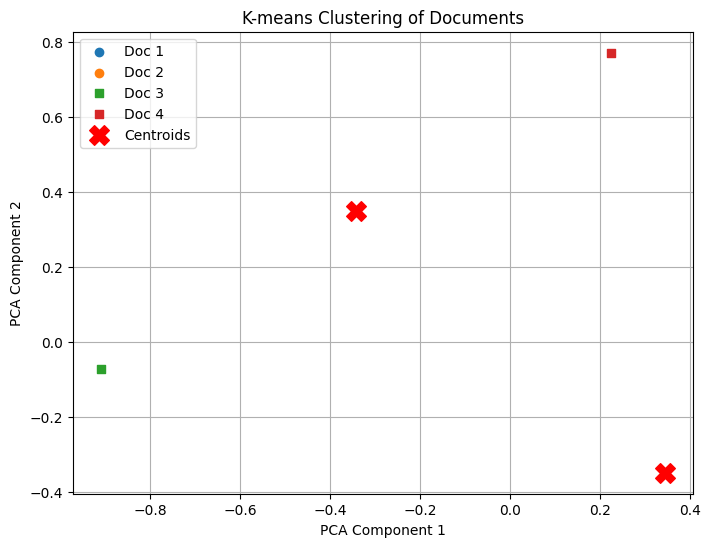

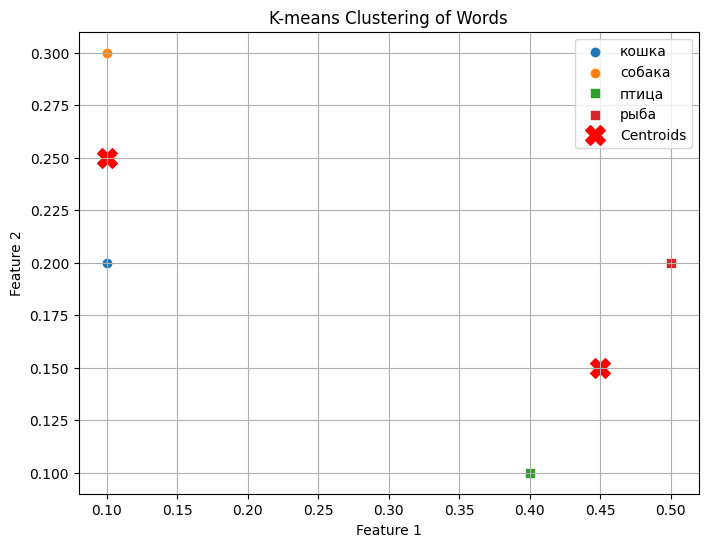

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Пример 1: Кластеризация документов на основе TF-IDF

# Шаг 1: Создаем массив документов
documents = [
    "Я люблю кошек.",
    "Я люблю собак.",
    "Кошки и собаки — это домашние животные.",
    "Я не люблю домашних животных."
]

# Шаг 2: Создаем TF-IDF векторы
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents).toarray()

# Шаг 3: Применяем K-средние
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Шаг 4: Визуализация
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(len(documents)):
    plt.scatter(X_reduced[i, 0], X_reduced[i, 1], label=f'Doc {i+1}', marker='o' if labels[i] == 0 else 's')

centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("K-means Clustering of Documents")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

# Пример 2: Кластеризация слов с использованием Word Embeddings

# Шаг 1: Создаем векторы слов
words = ["кошка", "собака", "птица", "рыба"]
word_vectors = np.array([[0.1, 0.2], [0.1, 0.3], [0.4, 0.1], [0.5, 0.2]])

# Шаг 2: Применяем K-средние
kmeans_words = KMeans(n_clusters=2, random_state=42)
kmeans_words.fit(word_vectors)
labels_words = kmeans_words.labels_

# Шаг 3: Визуализация
plt.figure(figsize=(8, 6))
for i in range(len(words)):
    plt.scatter(word_vectors[i, 0], word_vectors[i, 1], label=words[i], marker='o' if labels_words[i] == 0 else 's')

centroids_words = kmeans_words.cluster_centers_
plt.scatter(centroids_words[:, 0], centroids_words[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("K-means Clustering of Words")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

### Вопросы для самопроверки

1. Что такое алгоритм K-средних и для чего он используется?
2. Опишите основные шаги алгоритма K-средних.
3. Как происходит инициализация центроидов в K-средних? Какие методы инициализации существуют?
4. Как вычисляется расстояние между точками и центроидами в K-средних?
5. Что такое TF-IDF и как он используется в задачах NLP?
6. Объясните, как применяется K-средних для кластеризации текстовых данных.
7. Что такое PCA и почему он полезен при визуализации данных в K-средних?
8. Какой параметр определяет количество кластеров в K-средних, и как его выбрать?
9. Каковы основные недостатки алгоритма K-средних?
10. Объясните, что такое "плохая инициализация" центроидов и как это может повлиять на результаты кластеризации.
11. Как можно улучшить результаты K-средних?
12. Что такое "silhouette score" и как его можно использовать для оценки качества кластеризации?
13. Объясните, как K-средние могут быть использованы для сегментации пользователей в маркетинге.
14. В чем разница между K-средними и иерархической кластеризацией?
15. Какова роль метрики расстояния (например, евклидова) в K-средних и какие альтернативы могут быть использованы?

### Задачи для самостоятельной работы

1. Реализуйте алгоритм K-средних с нуля на Python для простой двумерной выборки.
2. Примените алгоритм K-средних к набору данных Iris, используя библиотеки `sklearn` и `matplotlib`.
3. Сгенерируйте случайные данные в двух измерениях и примените K-средние для кластеризации. Визуализируйте результаты.
4. Сравните результаты K-средних с K-средних++, используя тот же набор данных. Какова разница в результатах?
5. Используйте TF-IDF для векторизации набора текстов, а затем примените K-средние для кластеризации этих текстов.
6. Постройте график "плеча" для выбора оптимального числа кластеров на примере набора данных.
7. Примените алгоритм K-средних к двумерному набору данных, содержащему несколько кластеров разной формы. Как K-средние справляются с этой задачей?
8. Выполните кластеризацию текстов на русском языке с помощью K-средних, используя TF-IDF векторизацию.
9. Реализуйте функцию для оценки качества кластеризации с использованием "silhouette score".
10. Используйте PCA для снижения размерности 3D-набора данных перед кластеризацией. Как это повлияло на результаты?
11. Примените K-средние к набору данных MNIST, используя только некоторые признаковые столбцы. Какова точность кластеризации?
12. Сравните результаты K-средних с иерархической кластеризацией на одном и том же наборе данных. Какие различия вы заметили?
13. Определите влияние размерности на результаты K-средних. Создайте набор данных с высокой размерностью и проведите кластеризацию.
14. Изучите, как изменяются центроиды в процессе итераций K-средних для различных наборов данных. Визуализируйте эти изменения.
15. Попробуйте применить K-средние для анализа тональности текстов. Используйте метрики для оценки результатов.
16. Создайте кластеризованные изображения с помощью K-средних, применяя его к набору данных пикселей изображений.
17. Реализуйте K-средние на наборе данных, содержащем шум. Как шум влияет на качество кластеризации?
18. Проведите кластеризацию новостных статей по темам с помощью K-средних и визуализируйте результаты.
19. Измените количество итераций K-средних и проанализируйте влияние этого изменения на качество кластеризации.
20. Используйте K-средние для кластеризации пользователей на основе их поведения на веб-сайте. Как вы бы оценили результаты?
21. Создайте визуализацию, показывающую изменение метрик качества кластеризации при увеличении числа кластеров.
22. Изучите использование K-средних для сегментации клиентов в электронной коммерции.
23. Сравните производительность K-средних на сбалансированных и несбалансированных наборах данных.
24. Проведите кластеризацию новостей по категориям, используя K-средние и TF-IDF.
25. Исследуйте влияние выбора метрики расстояния на результаты K-средних.
26. Попробуйте альтернативные алгоритмы кластеризации (например, DBSCAN) и сравните их с K-средними на одном и том же наборе данных.
27. Реализуйте алгоритм K-средних с использованием других подходов к инициализации центроидов, таких как случайная инициализация.
28. Используйте K-средние для анализа клипов на YouTube, классифицируя их по темам или категориям.
29. Реализуйте визуализацию центроидов и данных в процессе кластеризации, показывая итерации K-средних.
30. Исследуйте возможность использования K-средних для кластеризации медицинских записей на основе симптомов пациентов.
